<a href="https://colab.research.google.com/github/SauloHenriqueAguiar/CryptoFinanceQuant/blob/main/preverprecobitcoinRF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


## importação bibliotecas

In [2]:
import yfinance as yf
import datetime as dt
import pandas as pd
import numpy as np
from numpy import arange
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV

## Ativo download

In [3]:
bitcoin = yf.download("BTC-USD", start="2015-01-01", end="2022-08-16")
bitcoin_df = pd.DataFrame(bitcoin)
bitcoin_df.to_csv("bitcoin.csv")

[*********************100%***********************]  1 of 1 completed


## Visualização de série 

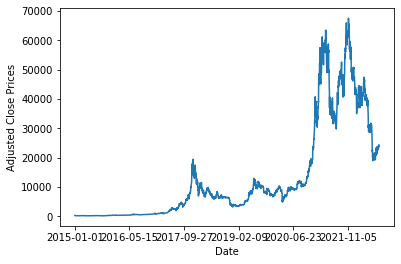

In [4]:
read_df = pd.read_csv("bitcoin.csv")
read_df.set_index("Date", inplace=True)
read_df['Adj Close'].plot()
plt.ylabel("Adjusted Close Prices")
plt.show()

## pre processamento dos dados

In [5]:
df = pd.read_csv("bitcoin.csv")
df.set_index("Date", inplace=True)
df.dropna(inplace=True)

## Seleção de Features

In [6]:
x = df.iloc[:, 0:5].values
y = df.iloc[:, 4].values

## Divisão de treino e teste

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.26,  random_state=0)

## Dimensionamento de Features

In [8]:
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

## Ajuste de Hiperparametros
usei validação cruzada de pesquisa aleatória neste projeto.

Os hiperparâmetros no modelo de floresta aleatória são usados ​​para aumentar o poder preditivo do modelo ou para torná-lo mais rápido.

Para um modelo de regressão florestal aleatória, os melhores parâmetros a serem considerados são:

1- n_estimators - número de árvores na floresta.

2- max_depth— profundidade máxima em uma árvore.

3-min_samples_split— número mínimo de pontos de dados antes que a amostra seja dividida.

4-min_samples_leaf — número mínimo de nós folha que devem ser amostrados.

5-bootstrap— amostragem para pontos de dados, verdadeiro ou falso.

6-random_state — números aleatórios gerados para a floresta aleatória.


In [9]:
grid_rf = {
'n_estimators': [20, 50, 100, 500, 1000],  
'max_depth': np.arange(1, 15, 1),  
'min_samples_split': [2, 10, 9], 
'min_samples_leaf': np.arange(1, 15, 2, dtype=int),  
'bootstrap': [True, False], 
'random_state': [1, 2, 30, 42]
}

In [15]:
model = RandomForestRegressor(n_estimators=400, random_state=42, min_samples_split=2, min_samples_leaf=1, max_depth=10, bootstrap=True)

In [16]:
rscv = RandomizedSearchCV(estimator=model, param_distributions=grid_rf, cv=3, n_jobs=-1, verbose=2, n_iter=100)
rscv_fit = rscv.fit(x_train, y_train)
best_parameters = rscv_fit.best_params_
print(best_parameters)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'random_state': 30, 'n_estimators': 20, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 14, 'bootstrap': True}


 ## Aplicar modelo e prever

In [17]:
model = RandomForestRegressor(n_estimators=500, random_state=42, min_samples_split=2, min_samples_leaf=1, max_depth=10, bootstrap=True)
model.fit(x_train, y_train)
predict = model.predict(x_test)
print(predict)
print(predict.shape)

[ 3857.85537235   702.01034045  2418.88981413 39165.30765909
  7462.35439741   257.89270495  3811.90296966  7413.12697512
   335.07447905  4126.44100142   703.50118207   375.49152257
   240.4011011  11768.41574527  9521.19477176 18733.55816602
 38578.38781588  6638.98783295  6305.22756405  3476.38066479
  3331.34013471 42239.84693296   265.4860506  40679.46880469
  9332.66610773 10356.47598085 57813.13321224 33876.10870508
   377.06878864 42849.09897201 31715.38210352  3854.54047208
 19168.68472274  6540.69395     1817.27135649 43907.39277995
   412.61468316  2606.51289537  9915.05191531   213.08859129
  4329.50838057  6969.210528   57280.89994922   457.12006468
   623.12136227 11494.25474628 38352.93589189  3894.16867229
   623.2699543   5362.56765622   226.49506756   275.09053383
 61689.98865521   225.82714985 56055.33623958 61486.48982656
  6325.00090128   306.24706793 41927.78810845  4137.6264744
   326.28514754  7543.55107043  3917.82029773 10129.85781849
 11204.75404232   920.616

## Métricas estatísticas e avaliação de desempenho

Métricas estatísticas são métricas de erro para regressão, e eu as usei para calcular riscos. A avaliação do modelo é crítica e precisa ser avaliada para reduzir os riscos e aumentar o desempenho do modelo.

O erro quadrático médio (RMSE) é o desvio padrão dos resíduos (erros de previsão). Os resíduos medem a distância dos pontos de dados da linha de regressão. O RMSE é uma medida de como esses resíduos estão espalhados. Em outras palavras, informa como os dados estão concentrados em torno da linha de melhor ajuste. Além disso, é a raiz quadrada de MSE. Quanto menor o valor de RMSE, melhor o desempenho. Deve ser baixo porque mede mais erros do que as outras métricas. O valor de RMSE maior que 0,5 reflete a baixa capacidade do modelo de prever os dados com precisão. O modelo irá prever dados mais precisos quando o valor de RMSE for menor que 0,5 e maior que 0,3.

O erro médio absoluto (MEA) mede a magnitude média dos erros em um conjunto de previsões sem considerar sua direção. É a diferença média absoluta entre a previsão e a observação real onde todas as diferenças individuais têm o mesmo peso. Mais notavelmente, mede a distância entre o valor real e o valor previsto. Suponha que haja um valor de MEA de 5. O valor real é 20 e o valor de previsão é 25. No entanto, o MAE não pune erros na previsão. Portanto, se os erros fossem observados, deveria ser o erro quadrático médio ou o erro quadrático médio. Quanto menores os valores, melhor.

O erro quadrático médio (MSE) leva a soma do valor absoluto do erro. O erro quadrático médio também determina o desempenho do modelo. Neste caso, erros maiores são bem notados, mais do que o do MAE. Quanto menor o valor de MSE, maior a precisão da previsão.

A avaliação de desempenho em aprendizado de máquina é vital para saber o desempenho da previsão e do modelo. Neste projeto, r-quadrado e precisão foram usados ​​para avaliar o modelo. O valor do resultado obtido com a avaliação do modelo determinará se o modelo precisa ser melhorado. Pode ser tentar um algoritmo diferente, hiper-ajustar os parâmetros, adicionar mais dados ou aplicar engenharia de recursos.

O R ao quadrado indica quão bem um modelo se ajusta a um determinado conjunto de dados. Indica o quão perto está a linha de regressão, ou seja, os valores previstos e reais plotados. O valor máximo é 1,0. Assim, quanto maiores os valores, melhor o ajuste do modelo. A linha de regressão ajusta-se bem aos dados e o desempenho do modelo é bom quando os valores de r-quadrado estão entre 0,6 e 1,0. Valores acima de 65% são considerados bons.

In [18]:
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, predict), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, predict), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predict)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, predict), 4))
print(f'Train Score : {model.score(x_train, y_train) * 100:.2f}% and Test Score : {model.score(x_test, y_test) * 100:.2f}% using Random Tree Regressor.')
errors = abs(predict - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Mean Absolute Error: 25.3211
Mean Squared Error: 4243.2047
Root Mean Squared Error: 65.1399
(R^2) Score: 1.0
Train Score : 100.00% and Test Score : 100.00% using Random Tree Regressor.
Accuracy: 99.77 %.


## Coleta os dias futuros dos valores previstos e plota

In [19]:
predictions = pd.DataFrame({"Predictions": predict}, index=pd.date_range(start=df.index[-1], periods=len(predict), freq="D"))
predictions.to_csv("Predicted-price-data.csv")
#colllects future days from predicted values
oneyear_df = pd.DataFrame(predictions[:252])
oneyear_df.to_csv("one-year-predictions.csv")
onemonth_df = pd.DataFrame(predictions[:21])
onemonth_df.to_csv("one-month-predictions.csv")
fivedays_df = pd.DataFrame(predictions[:5])
fivedays_df.to_csv("five-days-predictions.csv")

## Previsão de 1 ano

Buy price and date
    Unnamed: 0  Predictions
39  2022-09-24   213.088591
Sell price and date
    Unnamed: 0   Predictions
90  2022-11-14  64262.202437


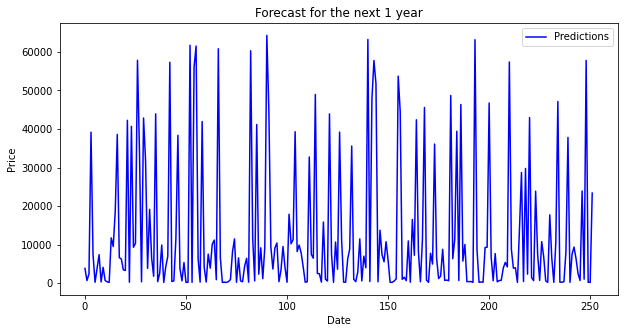

In [22]:
oneyear_df_pred = pd.read_csv("one-year-predictions.csv")
#oneyear_df_pred.set_index("Date", inplace=True)
buy_price = min(oneyear_df_pred["Predictions"])
sell_price = max(oneyear_df_pred["Predictions"])
oneyear_buy = oneyear_df_pred.loc[oneyear_df_pred["Predictions"] == buy_price]
oneyear_sell = oneyear_df_pred.loc[oneyear_df_pred["Predictions"] == sell_price]
print("Buy price and date")
print(oneyear_buy)
print("Sell price and date")
print(oneyear_sell)
oneyear_df_pred["Predictions"].plot(figsize=(10, 5), title="Forecast for the next 1 year", color="blue")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

## Previsão de um mes

Buy price and date
    Unnamed: 0  Predictions
12  2022-08-28   240.401101
Sell price and date
   Unnamed: 0   Predictions
3  2022-08-19  39165.307659


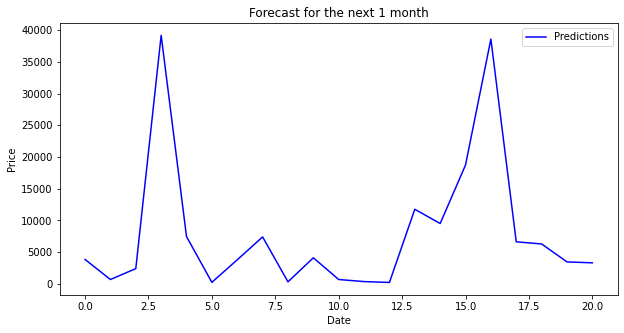

In [24]:
onemonth_df_pred = pd.read_csv("one-month-predictions.csv")
#onemonth_df_pred.set_index("Date", inplace=True)
buy_price = min(onemonth_df_pred["Predictions"])
sell_price = max(onemonth_df_pred["Predictions"])
onemonth_buy = onemonth_df_pred.loc[onemonth_df_pred["Predictions"] == buy_price]
onemonth_sell = onemonth_df_pred.loc[onemonth_df_pred["Predictions"] == sell_price]
print("Buy price and date")
print(onemonth_buy)
print("Sell price and date")
print(onemonth_sell)
onemonth_df_pred["Predictions"].plot(figsize=(10, 5), title="Forecast for the next 1 month", color="blue")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

## previsão de 5 dias

Buy price and date
   Unnamed: 0  Predictions
1  2022-08-17    702.01034
Sell price and date
   Unnamed: 0   Predictions
3  2022-08-19  39165.307659


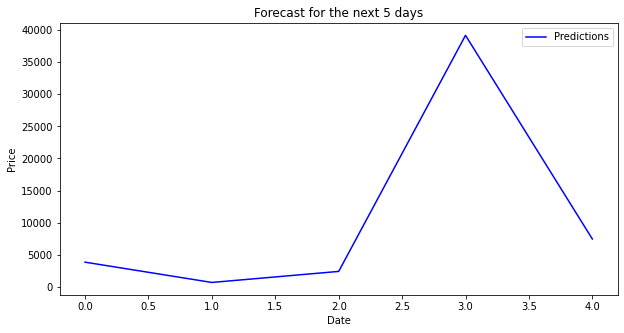

In [25]:
fivedays_df_pred = pd.read_csv("five-days-predictions.csv")
#fivedays_df_pred.set_index("Date", inplace=True)
buy_price = min(fivedays_df_pred["Predictions"])
sell_price = max(fivedays_df_pred["Predictions"])
fivedays_buy = fivedays_df_pred.loc[fivedays_df_pred["Predictions"] == buy_price]
fivedays_sell = fivedays_df_pred.loc[fivedays_df_pred["Predictions"] == sell_price]
print("Buy price and date")
print(fivedays_buy)
print("Sell price and date")
print(fivedays_sell)
fivedays_df_pred["Predictions"].plot(figsize=(10, 5), title="Forecast for the next 5 days", color="blue")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()